## Read the data and big overview

In [84]:
# major lab

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os, joblib, missingno

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

from sklearn_features.transformers import DataFrameSelector
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV  # for tunning

from xgboost import XGBRegressor

from sklearn.ensemble import VotingRegressor                          # voting best algorithm

In [9]:
FILE_PATH = os.path.join(os.getcwd(),'housing.csv')
df_housing = pd.read_csv(FILE_PATH)

In [10]:

df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
df_housing[df_housing['total_bedrooms'].isna()]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [13]:
df_housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:>

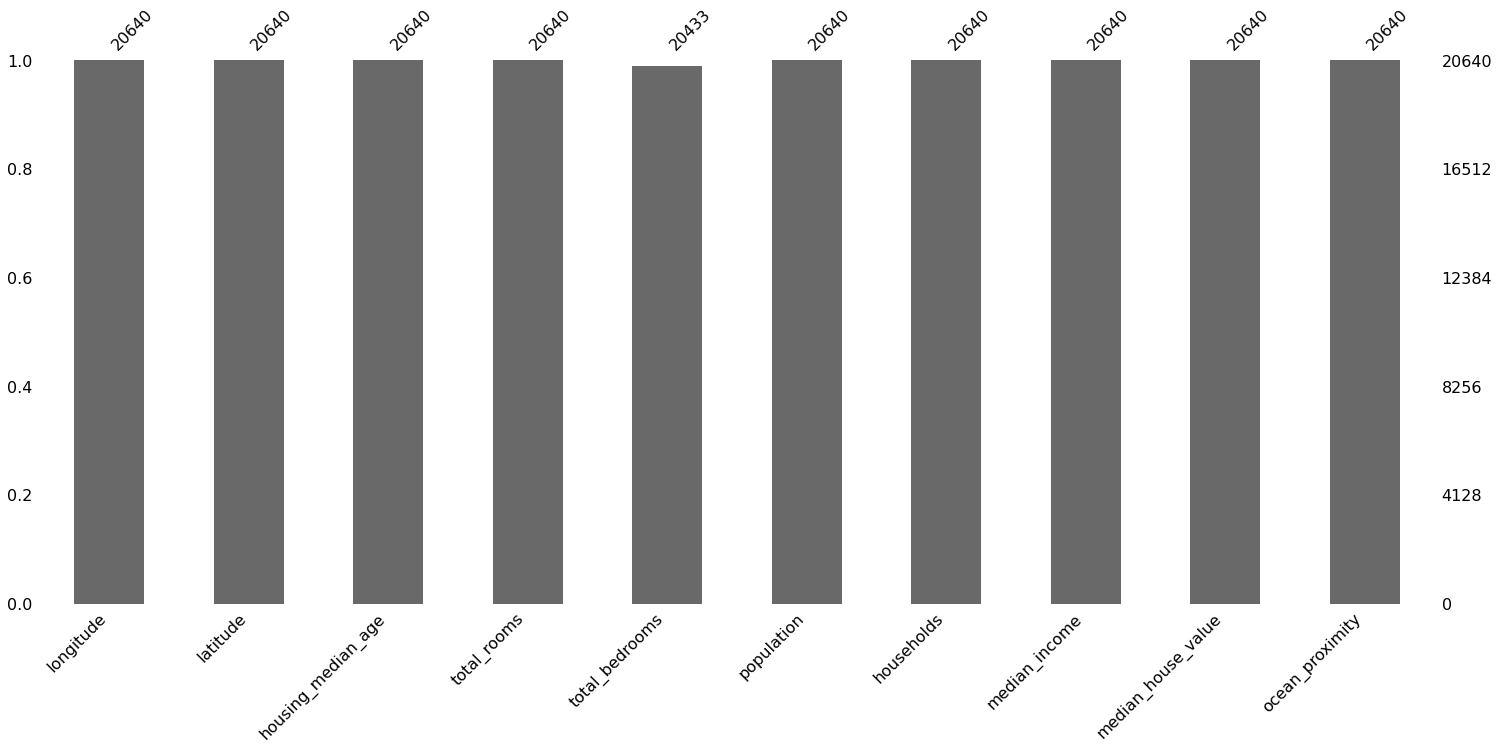

In [14]:
#over view to data

missingno.bar(df_housing)

<AxesSubplot:>

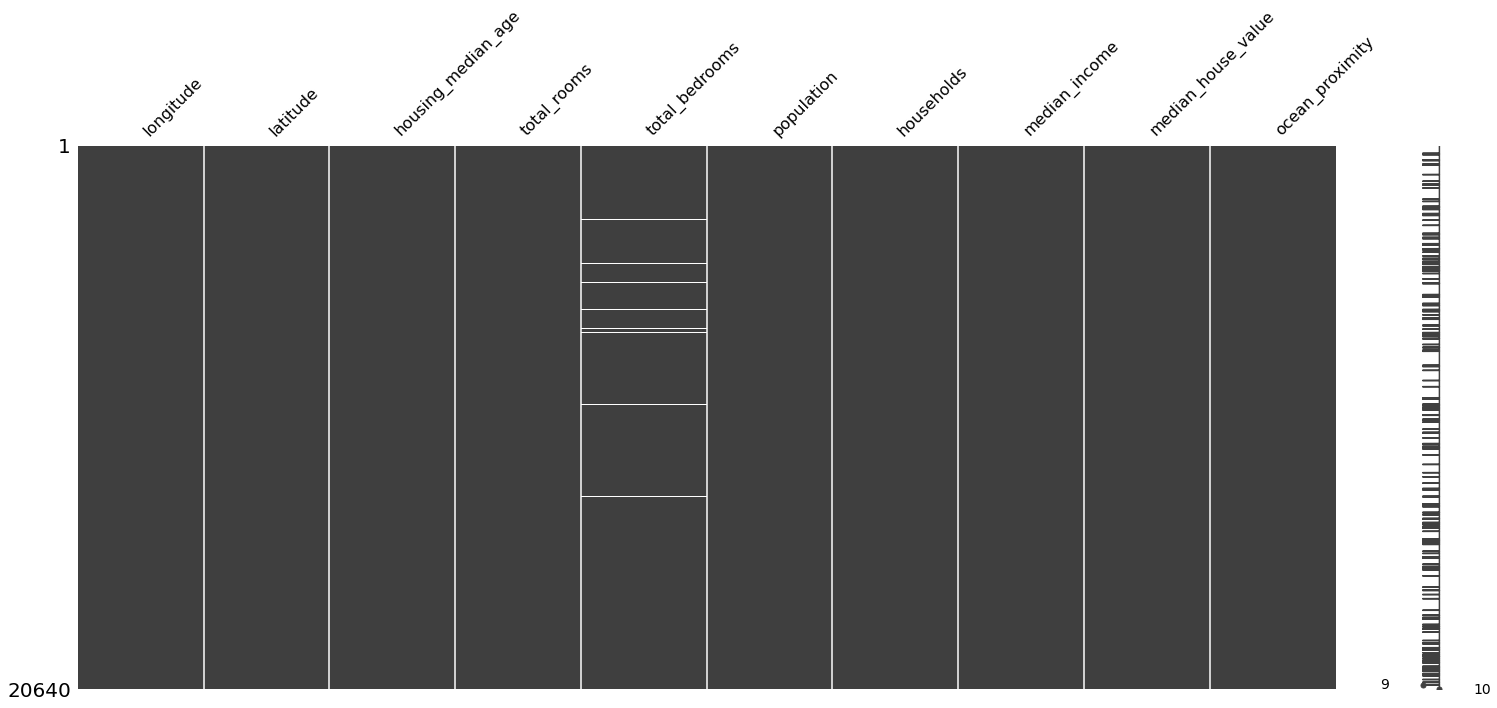

In [15]:
missingno.matrix(df_housing)

white line in total bedrooms mean that ther are null value in this feature and it about 207 value

## Exploratory Data Analysis (EDA)

In [16]:
ocean_values = df_housing['ocean_proximity'].unique()
ocean_values

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [17]:
orderd_counted = df_housing['ocean_proximity'].value_counts()

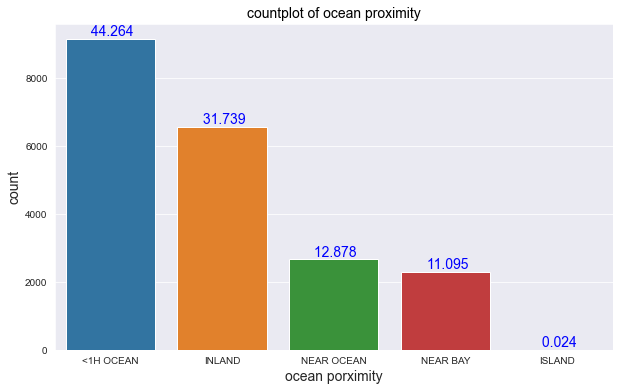

In [18]:
plt.figure(figsize=(10, 6))


sns.set_style('darkgrid')


sns.countplot(x = 'ocean_proximity', data = df_housing, order=orderd_counted.index)
plt.title("countplot of ocean proximity", c='k', fontsize=14)
plt.xlabel('ocean porximity', fontsize=14)
plt.ylabel('count', fontsize=14)




for i in range(len(orderd_counted)):
    text_plot = orderd_counted.values[i]
    text_val = f'{text_plot * 100 / len(df_housing): .3f}'
    plt.text(x=i, y=text_plot+100, s=text_val, ha='center', fontsize=14, c='b')


In [19]:
df_housing['ocean_proximity'].replace('<1H OCEAN', '1H OCEAN',inplace=True)
df_housing['ocean_proximity'].unique()

array(['NEAR BAY', '1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

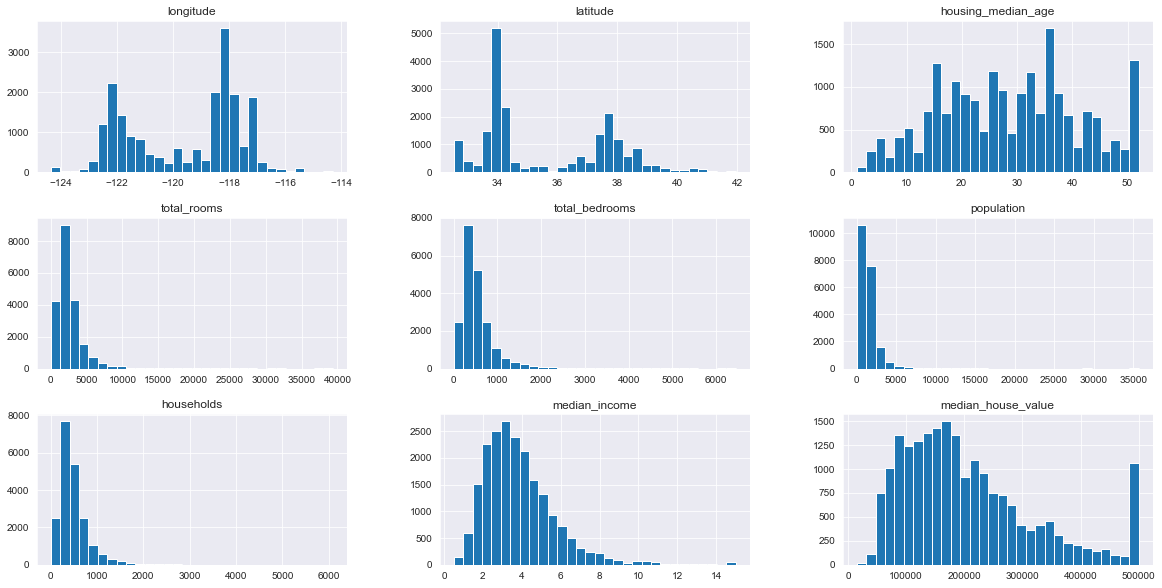

In [20]:
df_housing.hist(bins=30, figsize=(20, 10))
plt.show()

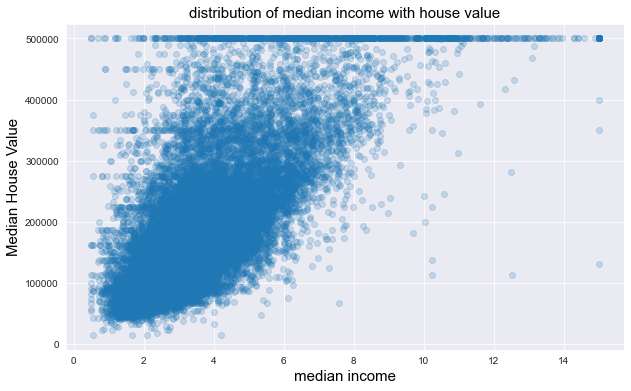

In [21]:
# scatter plot to important feature with the target ( median_house_value)
plt.figure(figsize=(10, 6))
plt.scatter(df_housing['median_income'], df_housing['median_house_value'], alpha=.2)
plt.title('distribution of median income with house value', fontsize=15, c='k')
plt.xlabel('median income', fontsize=15, c='k')
plt.ylabel('Median House Value', fontsize=15, c='k')
plt.show()

In [22]:
df_housing['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [23]:
bins = [-np.inf, 100000, 200000, 300000, 400000, 500000, np.Inf]
labels = ['0=100k', '100k-200k', '200k-300k', '300k-400k', '500k-600k', '> 600k']
house_value_bins = pd.cut(df_housing['median_house_value'], bins=bins, labels=labels)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


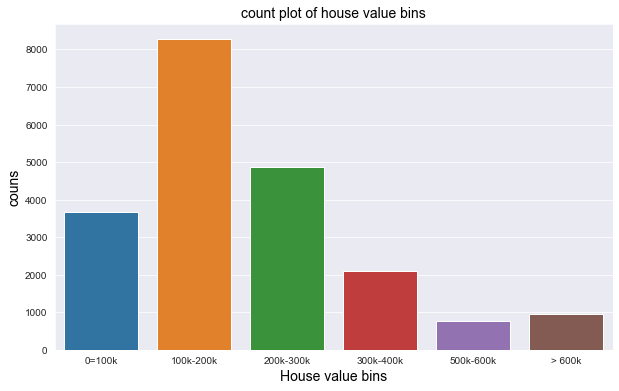

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(house_value_bins)
plt.title('count plot of house value bins', fontsize=14, c='k')
plt.xlabel('House value bins', fontsize=14, c='k')
plt.ylabel('couns', fontsize=14, c='k')
plt.show()

In [25]:
#tray to make median_income as chanks (bins)

income_bins = pd.cut(x = df_housing['median_income'],
      bins = [0, 1.5, 3, 4.5, 6, np.inf],
      labels = ['0 - 1.5', '1.5 - 3', '3 - 4.5', '4.5 - 6', '> 6'])

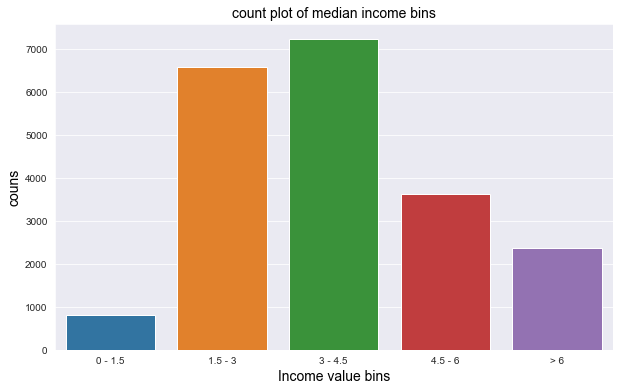

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x = income_bins)
plt.title('count plot of median income bins', fontsize=14, c='k')
plt.xlabel('Income value bins', fontsize=14, c='k')
plt.ylabel('couns', fontsize=14, c='k')
plt.show()

## Bivariate visualization

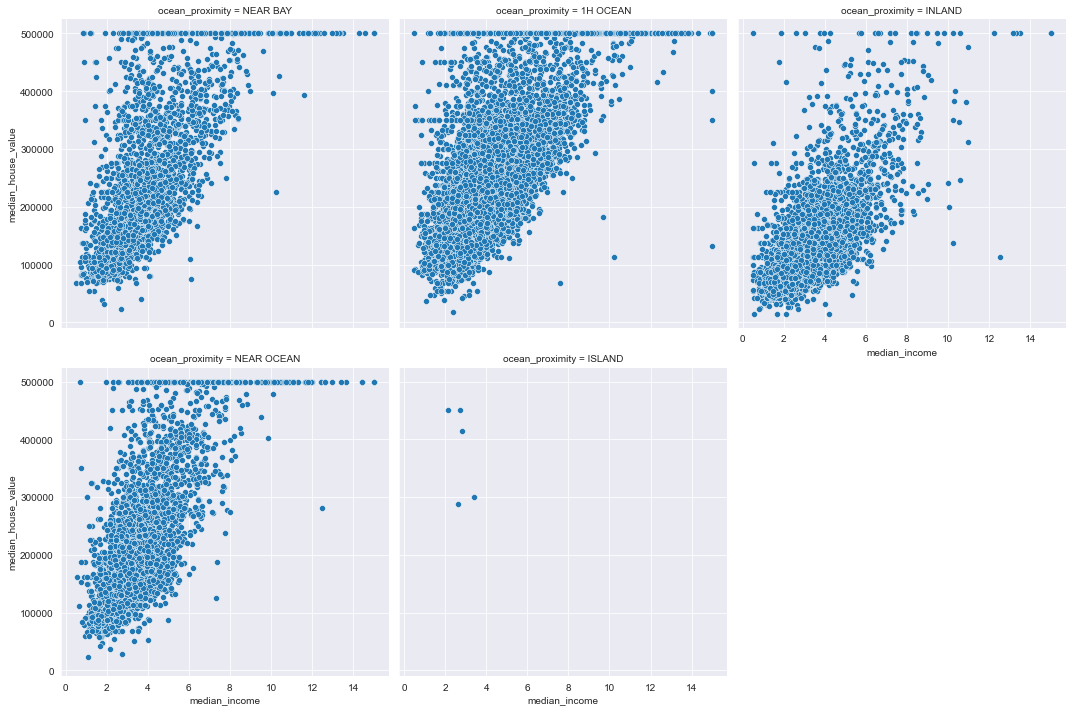

In [27]:
sns.relplot(x='median_income', y='median_house_value', data=df_housing, col='ocean_proximity', kind='scatter', col_wrap=3)
plt.show()

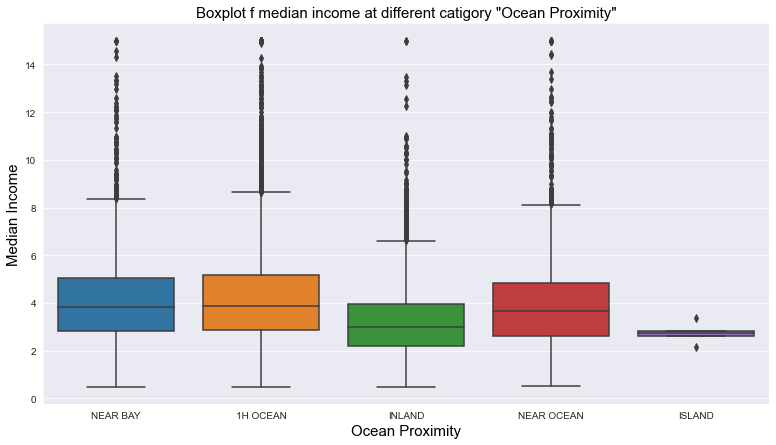

In [28]:
plt.figure(figsize=(13,7))
sns.boxplot(y='median_income', data=df_housing, x='ocean_proximity')
plt.title('Boxplot f median income at different catigory "Ocean Proximity"', fontsize=15, c='k')
plt.xlabel('Ocean Proximity', fontsize=15, c='k')
plt.ylabel('Median Income', fontsize=15, c='k')
plt.show()

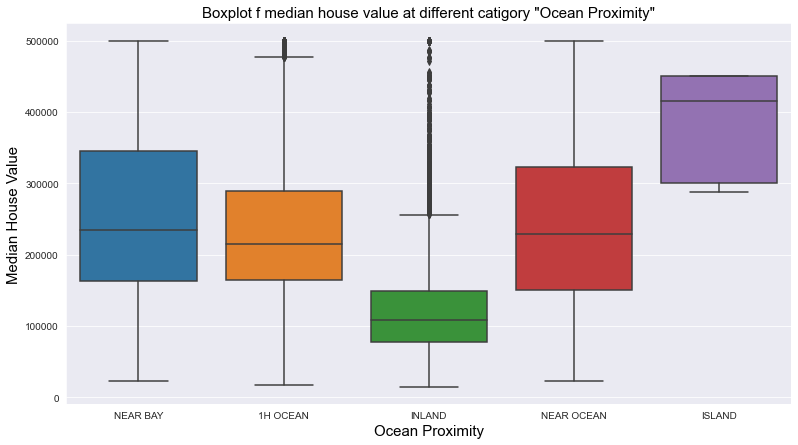

In [29]:
plt.figure(figsize=(13,7))
sns.boxplot(y='median_house_value', data=df_housing, x='ocean_proximity')
plt.title('Boxplot f median house value at different catigory "Ocean Proximity"', fontsize=15, c='k')
plt.xlabel('Ocean Proximity', fontsize=15, c='k')
plt.ylabel('Median House Value', fontsize=15, c='k')
plt.show()

## Multivariate Visualzation

C:\Users\ALI\AppData\Local\Temp\ipykernel_14136\144244115.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sc)


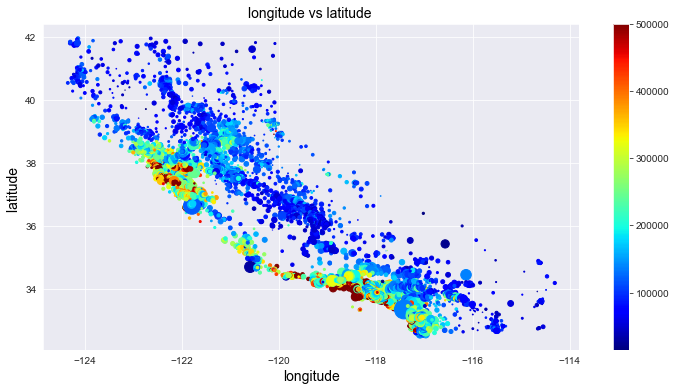

In [30]:
plt.figure(figsize=(12,6))
sc = plt.scatter(df_housing['longitude'],df_housing['latitude'], s=df_housing['population']/100,
            c=df_housing['median_house_value'], cmap='jet')
plt.title('longitude vs latitude ', fontsize=14, c='k')
plt.xlabel('longitude', fontsize=14, c='k')
plt.ylabel('latitude ', fontsize=14, c='k')
plt.colorbar(sc)
plt.show()

## check the correlation between the features and target

In [31]:
df_housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

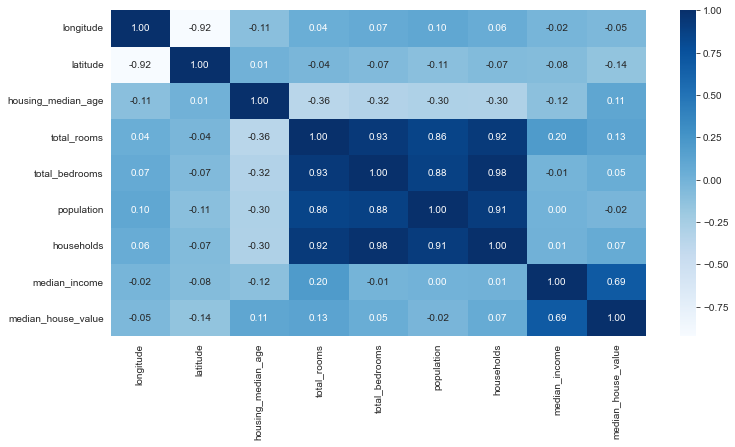

In [32]:
plt.figure(figsize=(12,6))
sns.heatmap(df_housing.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.show()

## Feature Engineering

In [33]:
df_housing['rooms_per_household'] = df_housing['total_rooms'] / df_housing['households']
df_housing['bedrooms_per_rooms'] = df_housing['total_bedrooms'] / df_housing['total_rooms']
df_housing['population_per_households'] = df_housing['population'] / df_housing['households']

In [34]:
df_housing.corr()['median_house_value'].sort_values(ascending=False)


median_house_value           1.000000
median_income                0.688075
rooms_per_household          0.151948
total_rooms                  0.134153
housing_median_age           0.105623
households                   0.065843
total_bedrooms               0.049686
population_per_households   -0.023737
population                  -0.024650
longitude                   -0.045967
latitude                    -0.144160
bedrooms_per_rooms          -0.255880
Name: median_house_value, dtype: float64

In [35]:
X = df_housing.drop(columns='median_house_value', axis=1)
y = df_housing['median_house_value']

In [36]:
## split to train_full and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)


In [37]:
print('x_train shape -- ', x_train.shape)
print('y_train shape -- ', y_train.shape)
print('x_test shape -- ', x_test.shape)
print('y_test shape -- ', y_test.shape)

x_train shape --  (17544, 12)
y_train shape --  (17544,)
x_test shape --  (3096, 12)
y_test shape --  (3096,)


## Dealing With Null

In [38]:
# to know the categorical feature

cat = []
for col in x_train.columns:
    if x_train[col].dtype not in ['int32', 'int64', 'float32' ,'float64']:
        cat.append(col)
cat

['ocean_proximity']

In [39]:
num_colms = [col for col in x_train.columns if x_train[col].dtype  in ['int32', 'int64', 'float32' ,'float64']]
cat_colms = [col for col in x_train.columns if x_train[col].dtype not in ['int32', 'int64', 'float32' ,'float64']]

## standrize features

## pipeline for numerical feature

In [40]:
num_pipeline = Pipeline(steps=[
                                ('imputer', SimpleImputer(strategy='median')),
                                ('scaler', StandardScaler())
                            ])

x_train_num = num_pipeline.fit_transform(x_train[num_colms])
x_test_num = num_pipeline.transform(x_test[num_colms])

## categorical Features

### one hot encoding

## pipeline for categorical feature

In [41]:
cat_pipeline = Pipeline(steps=[
                                ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                ('ohe', OneHotEncoder(sparse=False))
                            ])

x_train_cat = cat_pipeline.fit_transform(x_train[cat_colms])
x_test_cat = cat_pipeline.transform(x_test[cat_colms])

x_train_cat

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [42]:
# categoricl pipeline
cat_pipeline = Pipeline(steps=[
                                ('selector', DataFrameSelector(cat_colms)),
                                ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                ('ohe', OneHotEncoder(sparse=False))
                            ])

#numerical pipeline
num_pipeline = Pipeline(steps=[
                                ('selector', DataFrameSelector(num_colms)),
                                ('imputer', SimpleImputer(strategy='median')),
                                ('scaler', StandardScaler())
                            ])

total_pipeline = FeatureUnion(transformer_list=[
                                                ('num', num_pipeline),
                                                ('categ', cat_pipeline)
                                            ])

x_train_final = total_pipeline.fit_transform(x_train)
x_test_final = total_pipeline.transform(x_test)

In [43]:
x_train_final.shape, x_test_final.shape


((17544, 16), (3096, 16))

In [44]:
y_train.shape, y_test.shape

((17544,), (3096,))

## linear regression

In [45]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_final, y_train)

LinearRegression()

In [46]:
mse_score_lin = cross_val_score(estimator=lin_reg, X=x_train_final, y=y_train,
                                cv=5, n_jobs=-1,scoring='neg_mean_squared_error')

mse_score_lin = np.sqrt(-1 * mse_score_lin)
mse_score_lin.mean()

67876.95862204042

In [47]:
y_predect_lin = cross_val_predict(estimator=lin_reg, X=x_train_final, y=y_train,
                                 cv=5, n_jobs=-1, method='predict')
y_predect_lin

array([184224., 230272., 144928., ..., 194944., 278560., 273184.])

In [48]:

np.sqrt(mean_squared_error(y_train, y_predect_lin))

67895.59841739414

## SGDRegressor

In [49]:
sgd_reg = SGDRegressor()
sgd_reg.fit(x_train_final,y_train)

SGDRegressor()

In [50]:
mse_score_sgd = cross_val_score(estimator=sgd_reg, X=x_train_final, y=y_train,
                                cv=5, n_jobs=-1,scoring='neg_mean_squared_error')

mse_score_sgd = np.sqrt(-1 * mse_score_sgd)
mse_score_sgd.mean()

33637829.97303954

## Random Forest

In [51]:
forest_reg = RandomForestRegressor(n_estimators=150, max_depth=6, random_state=42, max_samples=0.8)

forest_reg.fit(x_train_final, y_train) ##train

RandomForestRegressor(max_depth=6, max_samples=0.8, n_estimators=150,
                      random_state=42)

### TUNNING

In [52]:
parms_best_forest = {'n_estimators' : np.arange(100, 500, 50),    #8
                     'max_depth' : np.arange(4, 20, 2),           #8
                     'max_samples' : [0.7, 0.8, 0.9, 1]}          #4


search_random_forest = RandomizedSearchCV(estimator=forest_reg,
                                          param_distributions=parms_best_forest,
                                          n_iter=20,
                                          random_state=42,
                                          scoring='neg_mean_squared_error',
                                          cv=5,
                                          verbose=6)

  
search_random_forest.fit(x_train_final,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=18, max_samples=0.7, n_estimators=300;, score=-2387240950.516 total time= 1.1min
[CV 2/5] END max_depth=18, max_samples=0.7, n_estimators=300;, score=-2762446681.621 total time= 1.0min
[CV 3/5] END max_depth=18, max_samples=0.7, n_estimators=300;, score=-2648935103.247 total time= 1.1min
[CV 4/5] END max_depth=18, max_samples=0.7, n_estimators=300;, score=-2417353818.788 total time=  58.7s
[CV 5/5] END max_depth=18, max_samples=0.7, n_estimators=300;, score=-2538817122.387 total time= 1.1min
[CV 1/5] END max_depth=4, max_samples=0.7, n_estimators=400;, score=-4334005984.350 total time=  28.1s
[CV 2/5] END max_depth=4, max_samples=0.7, n_estimators=400;, score=-4593725450.025 total time=  22.0s
[CV 3/5] END max_depth=4, max_samples=0.7, n_estimators=400;, score=-4514789699.529 total time=  21.5s
[CV 4/5] END max_depth=4, max_samples=0.7, n_estimators=400;, score=-4340436187.570 total time=  25.9s
[CV 5/

[CV 5/5] END max_depth=8, max_samples=0.7, n_estimators=300;, score=-3163105351.405 total time=  36.3s
[CV 1/5] END max_depth=16, max_samples=0.7, n_estimators=450;, score=-2400224852.719 total time= 1.4min
[CV 2/5] END max_depth=16, max_samples=0.7, n_estimators=450;, score=-2764315256.804 total time= 1.6min
[CV 3/5] END max_depth=16, max_samples=0.7, n_estimators=450;, score=-2653233236.403 total time= 1.6min
[CV 4/5] END max_depth=16, max_samples=0.7, n_estimators=450;, score=-2423457596.285 total time=130.1min
[CV 5/5] END max_depth=16, max_samples=0.7, n_estimators=450;, score=-2553564248.378 total time= 1.1min
[CV 1/5] END max_depth=4, max_samples=0.8, n_estimators=450;, score=-4349316458.530 total time=  22.0s
[CV 2/5] END max_depth=4, max_samples=0.8, n_estimators=450;, score=-4609289274.238 total time=  22.4s
[CV 3/5] END max_depth=4, max_samples=0.8, n_estimators=450;, score=-4537898367.163 total time=  21.6s
[CV 4/5] END max_depth=4, max_samples=0.8, n_estimators=450;, score

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=6, max_samples=0.8,
                                                   n_estimators=150,
                                                   random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                                        'max_samples': [0.7, 0.8, 0.9, 1],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=6)

In [53]:
best_forest = search_random_forest.best_estimator_

In [60]:
search_random_forest.best_params_

# {'n_estimators': 200, 'max_samples': 0.9, 'max_depth': 18}         output       best_params_
# 2534932368.3318586                                                 output       best_score_

{'n_estimators': 200, 'max_samples': 0.9, 'max_depth': 18}

In [99]:
y_pred_tuned_forest = cross_val_predict(estimator=best_forest, X=x_train_final, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)

## feature importance

In [55]:
best_forest.feature_importances_[:11]

array([0.05650581, 0.05594102, 0.04366347, 0.01245999, 0.0113636 ,
       0.01116485, 0.01004916, 0.48035942, 0.02536125, 0.02394768,
       0.12252293])

In [70]:
feature_importance_forest = {}
for name, score in zip(num_colms, best_forest.feature_importances_[:11]):
    feature_importance_forest[name] = score
   
feature_importance_forest

{'longitude': 0.056505805358730725,
 'latitude': 0.055941024447004564,
 'housing_median_age': 0.04366346890718176,
 'total_rooms': 0.0124599891210076,
 'total_bedrooms': 0.011363600883964058,
 'population': 0.011164845142135811,
 'households': 0.010049160155576931,
 'median_income': 0.4803594222901851,
 'rooms_per_household': 0.025361249192695515,
 'bedrooms_per_rooms': 0.023947682591419838,
 'population_per_households': 0.12252292894044413}

In [69]:
keys_forest = feature_importance_forest.keys()
value_forest = feature_importance_forest.values()

df_feature_importance_forest = pd.DataFrame({'Feature' : keys_forest, 'Scores' : value_forest})
df_feature_importance_forest = df_feature_importance_forest.sort_values(by='Scores', ascending=False)
df_feature_importance_forest

,Feature,Scores
7,median_income,0.480359
10,population_per_households,0.122523
0,longitude,0.056506
1,latitude,0.055941
2,housing_median_age,0.043663
8,rooms_per_household,0.025361
9,bedrooms_per_rooms,0.023948
3,total_rooms,0.012460
4,total_bedrooms,0.011364
5,population,0.011165


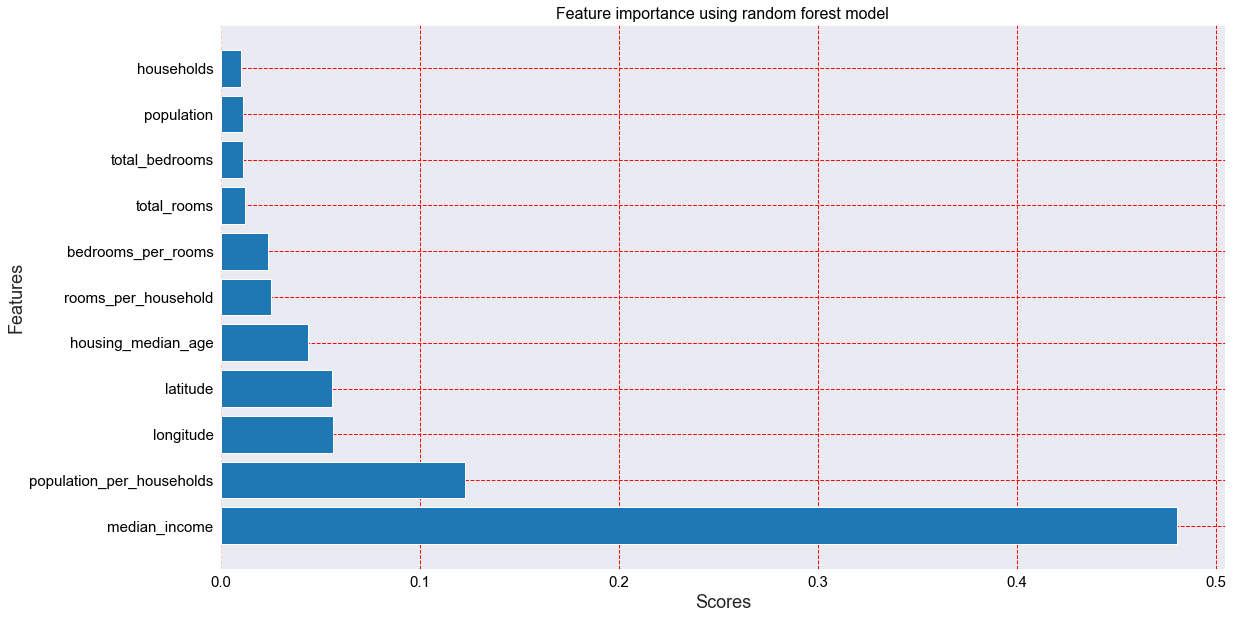

In [68]:
plt.figure(figsize=(18,10))
plt.barh(y=df_feature_importance_forest['Feature'], width=df_feature_importance_forest['Scores'])

plt.title('Feature importance using random forest model', fontsize=16, c='k')
plt.xlabel('Scores', fontsize=18)
plt.ylabel('Features', fontsize=18)
plt.xticks(c='k', fontsize=15)
plt.yticks(c='k', fontsize=15)
plt.grid(color='r', linestyle='--', linewidth=1)

plt.show()

In [71]:
xgb_reg = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=.1, subsample=0.8)
xgb_reg.fit(x_train_final, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [77]:
rmse_scores_xgb = cross_val_score(estimator=xgb_reg, 
                                  X=x_train_final, 
                                  y=y_train, 
                                  cv=5, 
                                  scoring='neg_mean_squared_error',
                                  n_jobs=-1)


rmse_scores_xgb = rmse_scores_xgb * -1       # make the value positive
rmse_scores_xgb = np.sqrt(rmse_scores_xgb)   # root mean square error

print(f' RMSE Score using xgboost   {np.round(rmse_scores_xgb, 4)}')
print(f'Mean RMSE Score using xgboost   {rmse_scores_xgb.mean() : .4f}')

 RMSE Score using xgboost   [46401.218  48678.5008 48205.3615 46268.9467 48333.7256]
Mean RMSE Score using xgboost    47577.5505


In [78]:
params_best_xgd = {'n_estimators' : np.arange(100, 200, 50),
                   'max_depth' : np.arange(4,15,2),
                   'learning_rate' : [.1, .2],
                   'subsample' : [.8, .9]}

grid_xgb = GridSearchCV(estimator=xgb_reg,
                        param_grid=params_best_xgd,
                        cv=5,
                        n_jobs=-1,
                        verbose=6, 
                        scoring='neg_mean_squared_error')


grid_xgb.fit(x_train_final, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, ma...
                                    max_depth=6, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,


In [81]:
grid_xgb.best_params_            #{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.8}
grid_xgb.best_score_             #-2105430885.6069221

-2105430885.6069221

In [82]:
best_xgb = grid_xgb.best_estimator_

In [83]:
rmse_scores_tuned_xgb = cross_val_score(estimator=best_xgb, 
                                  X=x_train_final, 
                                  y=y_train, 
                                  cv=5, 
                                  scoring='neg_mean_squared_error',
                                  n_jobs=-1)


rmse_scores_tuned_xgb = rmse_scores_tuned_xgb * -1       # make the value positive
rmse_scores_tuned_xgb = np.sqrt(rmse_scores_tuned_xgb)   # root mean square error

print(f' RMSE Score using tuned xgboost   {np.round(rmse_scores_tuned_xgb, 4)}')
print(f'Mean RMSE Score using tuned xgboost   {rmse_scores_tuned_xgb.mean() : .4f}')

 RMSE Score using tuned xgboost   [44577.0097 46753.8341 46620.9049 45085.3031 46345.7689]
Mean RMSE Score using tuned xgboost    45876.5642


In [98]:
y_pred_tuned_xgb = cross_val_predict(estimator=best_xgb, X=x_train_final, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)

## VotingRegressor

In [85]:
voting_reg = VotingRegressor(estimators=
                                        [
                                        ('tuned_forest', best_forest),
                                        ('tuned_xgb', best_xgb)
                                        ]
                            )

voting_reg.fit(x_train_final, y_train)

VotingRegressor(estimators=[('tuned_forest',
                             RandomForestRegressor(max_depth=18,
                                                   max_samples=0.9,
                                                   n_estimators=200,
                                                   random_state=42)),
                            ('tuned_xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=...
                                          gamma=None, gpu_id=None,
                               

In [87]:
rmse_voting_scores = cross_val_score(estimator=voting_reg, 
                                  X=x_train_final, 
                                  y=y_train, 
                                  cv=5, 
                                  scoring='neg_mean_squared_error',
                                  n_jobs=-1)


rmse_voting_scores = rmse_voting_scores * -1       # make the value positive
rmse_voting_scores = np.sqrt(rmse_voting_scores)   # root mean square error

print(f' RMSE Score using voting   {np.round(rmse_voting_scores, 4)}')
print(f'Mean RMSE Score using voting   {rmse_voting_scores.mean() : .4f}')

 RMSE Score using voting   [45635.9122 48740.8813 47972.9388 46028.2578 47375.2949]
Mean RMSE Score using voting    47150.6570


## Compare

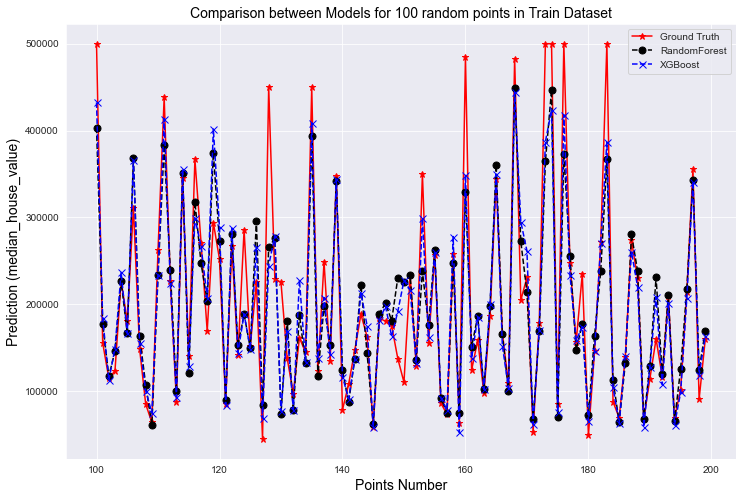

In [105]:
## Plotting
xx = np.arange(100, 200)  ## random selected points
## Plotting
plt.figure(figsize=(12, 8))
plt.plot(xx, y_train.values[100:200], 'r*-',  markersize=7, label='Ground Truth')  ## for train
plt.plot(xx, y_pred_tuned_forest[100:200], 'ko--', markersize=7, label='RandomForest')
plt.plot(xx, y_pred_tuned_xgb[100:200], 'bx--', markersize=7, label='XGBoost')
plt.title('Comparison between Models for 100 random points in Train Dataset', fontsize=14, color='k')
plt.xlabel('Points Number', fontsize=14, color='k')
plt.ylabel('Prediction (median_house_value)', fontsize=14, color='k')
plt.legend()
plt.grid('on')
plt.show()

## Download the best model   ----------   best_xgd

In [104]:
joblib.dump(best_xgb, 'model_XGBoost.pkl')

['model_XGBoost.pkl']

## load the model 

In [106]:
loaded_model = joblib.load('model_XGBoost.pkl')

In [107]:
y_pred_test = loaded_model.predict(x_test_final)

In [108]:
np.sqrt(mean_squared_error(y_test, y_pred_test))

44640.304206671775